# IMAGEN A MATRIZ


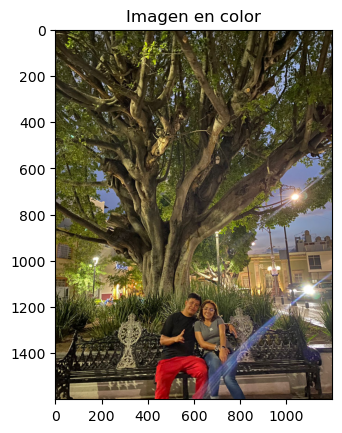

Dimensiones de la matriz: (1600, 1200, 3)


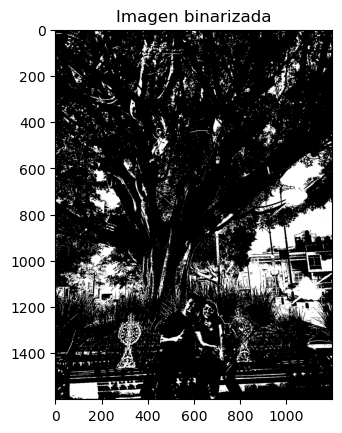

Dimensiones de la imagen binarizada: (1600, 1200)


In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen usando Pillow
image_path = "imagenes/CorazonDeMelon.jpeg"
img = Image.open(image_path)

# Convertir la imagen a una matriz NumPy
img_array = np.array(img)

# Mostrar la imagen original
plt.imshow(img_array)
plt.title('Imagen en color')
plt.show()

# Imprimir la matriz NumPy y sus dimensiones
print(f"Dimensiones de la matriz: {img_array.shape}")

# Convertir a escala de grises
gray_img = img.convert('L')
gray_img_array = np.array(gray_img)

# Realizar binarización
threshold = 128  # Umbral para binarización
binary_img_array = (gray_img_array > threshold).astype(np.uint8) * 255

# Mostrar la imagen binarizada
plt.imshow(binary_img_array, cmap='gray')
plt.title('Imagen binarizada')
plt.show()

# Imprimir la matriz binarizada
print(f"Dimensiones de la imagen binarizada: {binary_img_array.shape}")



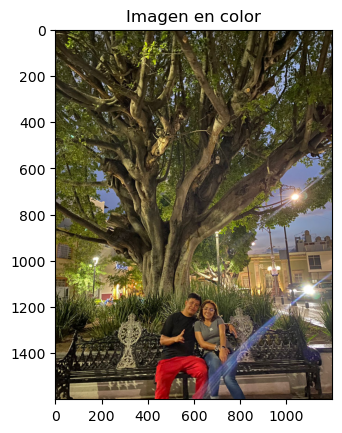

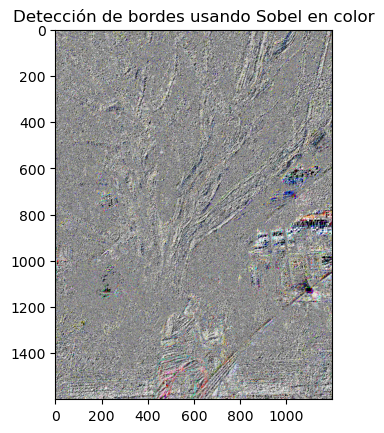

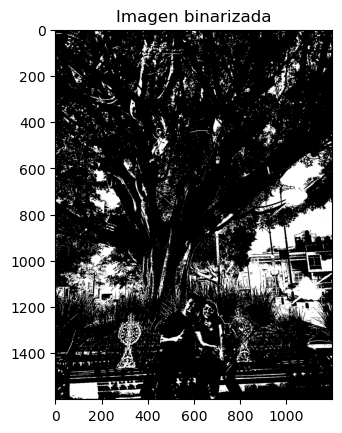

Dimensiones de la matriz original: (1600, 1200, 3)
Dimensiones de la matriz Sobel: (1600, 1200, 3)
Dimensiones de la imagen binarizada: (1600, 1200)


In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Cargar la imagen usando Pillow
image_path = "imagenes/CorazonDeMelon.jpeg"
img = Image.open(image_path)

# Convertir la imagen a una matriz NumPy (se mantendrá a color)
img_array = np.array(img)

# Mostrar la imagen en color usando matplotlib
plt.imshow(img_array)
plt.title('Imagen en color')
plt.show()

# Aplicar el filtro Sobel en los ejes X e Y para cada canal
sobel_x = np.zeros_like(img_array)
sobel_y = np.zeros_like(img_array)

for i in range(3):  # Aplicamos Sobel a cada canal (RGB)
    sobel_x[:, :, i] = ndimage.sobel(img_array[:, :, i], axis=0)
    sobel_y[:, :, i] = ndimage.sobel(img_array[:, :, i], axis=1)

# Calcular la magnitud del gradiente combinando Sobel X y Sobel Y
sobel_magnitude = np.hypot(sobel_x, sobel_y)
sobel_magnitude = sobel_magnitude / np.max(sobel_magnitude) * 255  # Normalización

# Mostrar el resultado del filtro Sobel en color
plt.imshow(sobel_magnitude.astype(np.uint8))
plt.title('Detección de bordes usando Sobel en color')
plt.show()

# Convertir a escala de grises para binarización
gray_img = img.convert('L')
gray_img_array = np.array(gray_img)

# Realizar binarización
threshold = 128  # Umbral para binarización
binary_img_array = (gray_img_array > threshold).astype(np.uint8) * 255

# Mostrar la imagen binarizada
plt.imshow(binary_img_array, cmap='gray')
plt.title('Imagen binarizada')
plt.show()

# Imprimir las dimensiones de la imagen y los bordes detectados
print(f"Dimensiones de la matriz original: {img_array.shape}")
print(f"Dimensiones de la matriz Sobel: {sobel_magnitude.shape}")
print(f"Dimensiones de la imagen binarizada: {binary_img_array.shape}")


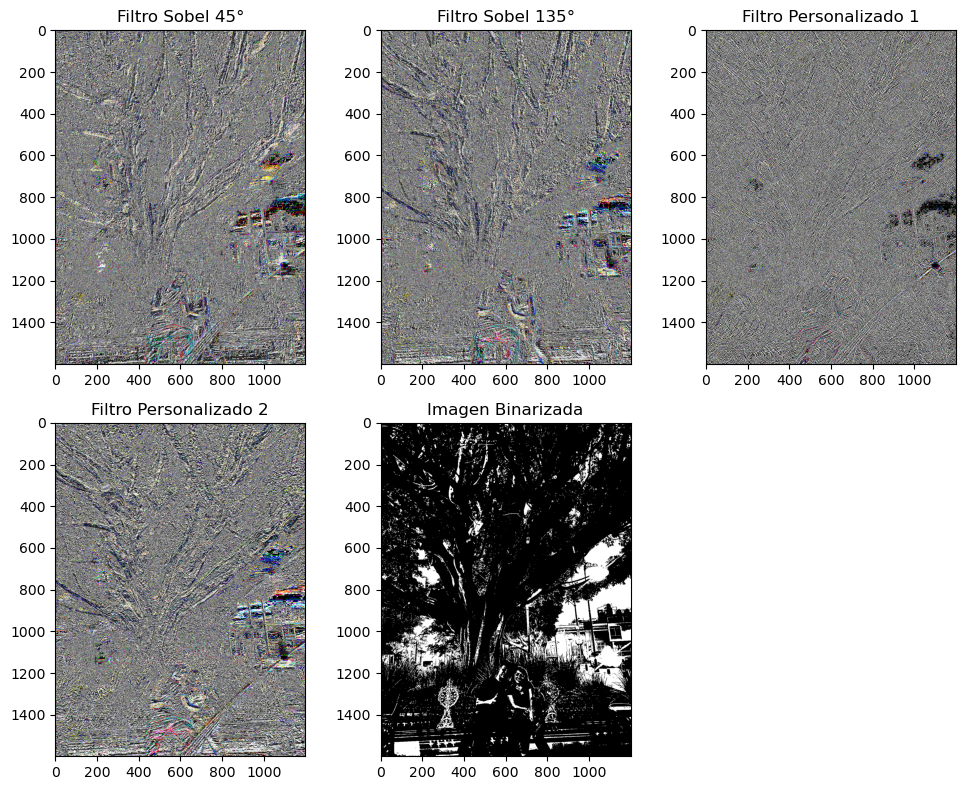

In [10]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# Crear nuevas matrices de convolución (kernels)
sobel_45 = np.array([[-2, -1, 0],
                     [-1,  0, 1],
                     [ 0,  1, 2]])

sobel_135 = np.array([[ 0, 1, 2],
                      [-1, 0, 1],
                      [-2,-1, 0]])

# Filtros aleatorios personalizados
custom_kernel_1 = np.array([[1, 0, -1],
                            [0, 0,  0],
                            [-1, 0,  1]])

custom_kernel_2 = np.array([[ 1,  1,  1],
                            [ 0,  0,  0],
                            [-1, -1, -1]])

# Convertir la imagen a escala de grises para binarización
gray_img = img.convert('L')
gray_img_array = np.array(gray_img)

# Realizar binarización
threshold = 128  # Umbral para binarización
binary_img_array = (gray_img_array > threshold).astype(np.uint8) * 255

# Aplicar los filtros a cada canal de la imagen (asumiendo que img_array es una imagen en color)
sobel_45_result = np.zeros_like(img_array)
sobel_135_result = np.zeros_like(img_array)
custom_1_result = np.zeros_like(img_array)
custom_2_result = np.zeros_like(img_array)

for i in range(3):  # Aplicamos los filtros a cada canal (RGB)
    sobel_45_result[:, :, i] = convolve(img_array[:, :, i], sobel_45)
    sobel_135_result[:, :, i] = convolve(img_array[:, :, i], sobel_135)
    custom_1_result[:, :, i] = convolve(img_array[:, :, i], custom_kernel_1)
    custom_2_result[:, :, i] = convolve(img_array[:, :, i], custom_kernel_2)

# Mostrar los resultados de los nuevos filtros
plt.figure(figsize=(10, 8))

plt.subplot(231)
plt.imshow(sobel_45_result.astype(np.uint8))
plt.title('Filtro Sobel 45°')

plt.subplot(232)
plt.imshow(sobel_135_result.astype(np.uint8))
plt.title('Filtro Sobel 135°')

plt.subplot(233)
plt.imshow(custom_1_result.astype(np.uint8))
plt.title('Filtro Personalizado 1')

plt.subplot(234)
plt.imshow(custom_2_result.astype(np.uint8))
plt.title('Filtro Personalizado 2')

plt.subplot(235)
plt.imshow(binary_img_array, cmap='gray')
plt.title('Imagen Binarizada')

plt.tight_layout()
plt.show()


## 1. Traslación (Translation)

La traslación desplaza todos los píxeles de la imagen por una cantidad fija en los ejes X e Y.

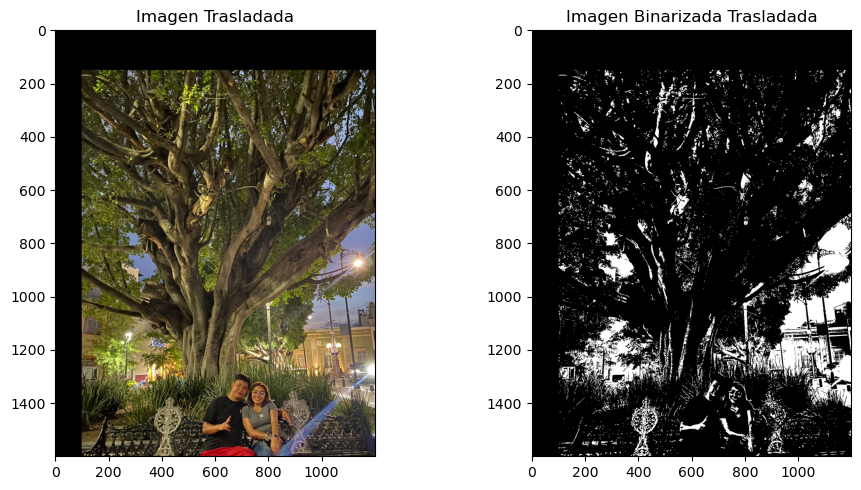

In [11]:
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pyplot as plt

# Aumentar los valores de traslación para que sea más notoria
tx, ty = 150, 100  # Mover la imagen 150 píxeles en X y 100 en Y

# Matriz de transformación afín correcta (matriz identidad con traslación)
translation_matrix = np.array([[1, 0],  # No se realiza ningún cambio en X
                               [0, 1]])  # No se realiza ningún cambio en Y

# Aplicar la traslación a la imagen original
translated_image = np.zeros_like(img_array)
for i in range(3):  # Aplica la traslación a cada canal (RGB)
    translated_image[:, :, i] = affine_transform(img_array[:, :, i], translation_matrix, offset=[-tx, -ty])

# Aplicar la traslación a la imagen binarizada
translated_binary_image = np.zeros_like(binary_img_array)
translated_binary_image = affine_transform(binary_img_array, translation_matrix, offset=[-tx, -ty])

# Mostrar la imagen trasladada original y binarizada
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(translated_image.astype(np.uint8))  # Asegúrate de que la imagen está en formato uint8
plt.title('Imagen Trasladada')

plt.subplot(122)
plt.imshow(translated_binary_image, cmap='gray')
plt.title('Imagen Binarizada Trasladada')

plt.tight_layout()
plt.show()


## 2. Rotación (Rotation)

La rotación gira la imagen alrededor de un punto (normalmente el origen).

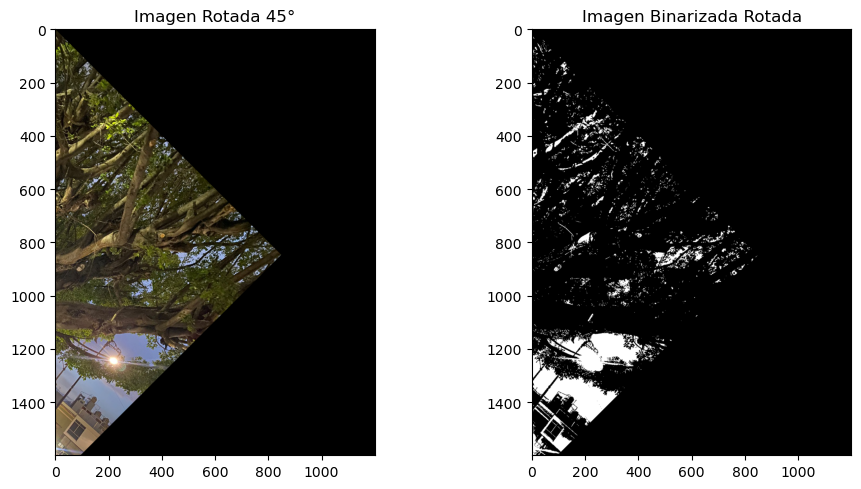

In [12]:
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pyplot as plt

# Rotar 45 grados
theta = np.radians(45)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Aplicar la rotación a la imagen original
rotated_image = np.zeros_like(img_array)
for i in range(3):  # Aplica la rotación a cada canal (RGB)
    rotated_image[:, :, i] = affine_transform(img_array[:, :, i], rotation_matrix)

# Aplicar la rotación a la imagen binarizada
rotated_binary_image = np.zeros_like(binary_img_array)
rotated_binary_image = affine_transform(binary_img_array, rotation_matrix)

# Mostrar la imagen rotada original y binarizada
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(rotated_image)
plt.title('Imagen Rotada 45°')

plt.subplot(122)
plt.imshow(rotated_binary_image, cmap='gray')
plt.title('Imagen Binarizada Rotada')

plt.tight_layout()
plt.show()


## 3. Cizallamiento (Shearing)

El cizallamiento deforma la imagen de manera que las líneas paralelas permanecen paralelas, pero los ángulos cambian.

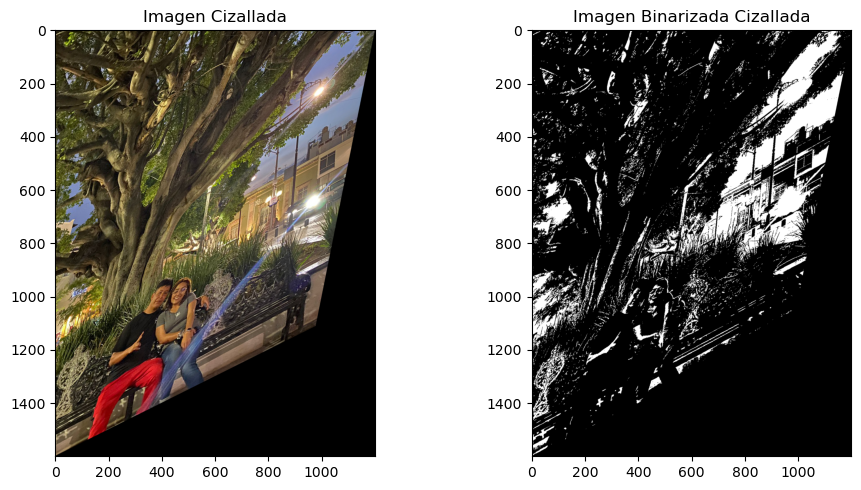

In [13]:
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pyplot as plt

# Factores de cizallamiento
sh_x, sh_y = 0.5, 0.2  # Cizallamiento en los ejes X e Y
shearing_matrix = np.array([[1, sh_x, 0],
                            [sh_y, 1, 0],
                            [0, 0, 1]])

# Aplicar el cizallamiento a la imagen original
sheared_image = np.zeros_like(img_array)
for i in range(3):  # Aplica el cizallamiento a cada canal (RGB)
    sheared_image[:, :, i] = affine_transform(img_array[:, :, i], shearing_matrix)

# Aplicar el cizallamiento a la imagen binarizada
sheared_binary_image = np.zeros_like(binary_img_array)
sheared_binary_image = affine_transform(binary_img_array, shearing_matrix)

# Mostrar la imagen cizallada original y binarizada
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(sheared_image)
plt.title('Imagen Cizallada')

plt.subplot(122)
plt.imshow(sheared_binary_image, cmap='gray')
plt.title('Imagen Binarizada Cizallada')

plt.tight_layout()
plt.show()


## 4. Escalado (Scaling)

El escalado cambia el tamaño de la imagen, aumentando o disminuyendo la distancia entre los píxeles.

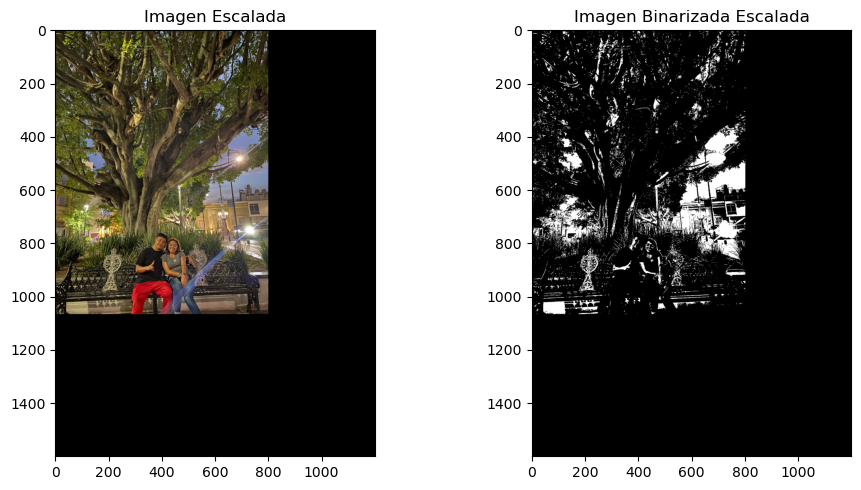

In [14]:
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pyplot as plt

# Aumentar el tamaño en 1.5 veces
sx, sy = 1.5, 1.5  # Factores de escala
scaling_matrix = np.array([[sx, 0, 0],
                           [0, sy, 0],
                           [0, 0, 1]])

# Aplicar la escala a la imagen original
scaled_image = np.zeros_like(img_array)
for i in range(3):  # Aplica la escala a cada canal (RGB)
    scaled_image[:, :, i] = affine_transform(img_array[:, :, i], scaling_matrix)

# Aplicar la escala a la imagen binarizada
scaled_binary_image = np.zeros_like(binary_img_array)
scaled_binary_image = affine_transform(binary_img_array, scaling_matrix)

# Mostrar la imagen escalada original y binarizada
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(scaled_image)
plt.title('Imagen Escalada')

plt.subplot(122)
plt.imshow(scaled_binary_image, cmap='gray')
plt.title('Imagen Binarizada Escalada')

plt.tight_layout()
plt.show()
